In [183]:
import numpy as np
import matplotlib.pyplot as plt
import bisect
from collections import Counter

In [184]:
#parameters

a = 0 #start of support
b = 9 #end of support

In [185]:
#Single time calculations of all x values in CDF

support_amount = b-a+1 #amount of numbers in the support
p_any_outcome = 1 / support_amount #probability of realizing any one number in the support

cdf_values = np.zeros(support_amount)

for i in range(support_amount):
    cdf_values[i] = p_any_outcome * (i+1)

In [186]:
#using one U(0,1) number, sample from a uniform(a,b)

unif_num = np.random.uniform(0,1) #single uniform U(0,1) realization

realization = bisect.bisect_left(cdf_values, unif_num) #use binary search to find the discrete value of the realization

print(f"{realization} was realized")

6 was realized


In [187]:
#repeat this sampling process many times to approximate the PMF

repititions = 100000 #amount of discrete uniform realizations to approximate PMF

arr_unif_num = np.random.uniform(0,1,repititions) #uniform U(0,1) realization stored in an array
arr_realization = np.zeros(repititions)

for i in range(0, repititions):
    arr_realization[i] = bisect.bisect_left(cdf_values, arr_unif_num[i]) #fill array wuth discrete realizations

result_dict = Counter(arr_realization) #use a dictionary to match key value pairs

for j in result_dict:
    result_dict[j] = result_dict[j] / repititions #reformat as percentage

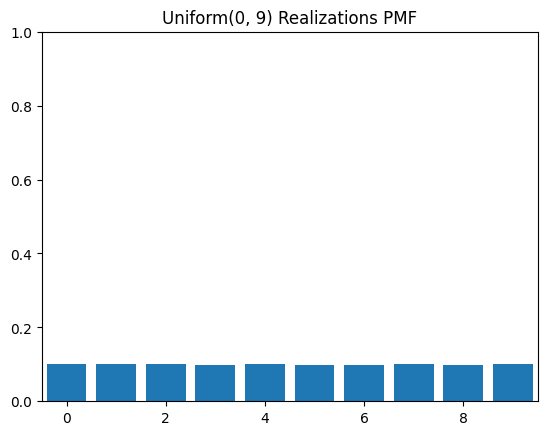

In [188]:
#chart the PMF approximation

x_axis_titles = list(result_dict.keys()) #number realized
heights = list(result_dict.values()) #percentage of number realized

plt.title(f"Uniform{a,b} Realizations PMF")
plt.bar(x_axis_titles, heights)
plt.xlim(a-0.5, b+0.5)
plt.ylim(0,1)

plt.show()